In [1]:
import sympy as sym
sym.init_printing()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
plt.style.use('./my_style.py')
import matplotlib.ticker as mticker

from cycler import cycler
import matplotlib.cm     as cm

# Example use of solver 

In [3]:
from solver import KmouExpansionJordan

In [29]:
# initilise solver
dum_kmou = KmouExpansionJordan(beta=0.2, K0=1, lamb_val=1.476)

In [58]:
# dum_kmou.tune_lambda(E_target=1.105861, a_target=0.875543)
dum_kmou.tune_lambda(E_target=1, a_target=1, frame='Einstein', maxiter=10) # tune lambda to recover E=E_target in the desired frame
# dum_kmou.solve() # to compute solutions without tuning

In [59]:
dum_kmou.lamb_val

In [60]:
# create dataframe with some output quantities
header, table = dum_kmou.eval()
df_out = pd.DataFrame(np.array(table).T, columns=header).set_index('a')

In [61]:
df_out

,phi,phi_a,E_kmou,E_kmou_a,A,mu_kmou
a,,,,,,
0.001000,-0.001353,-1.409857,17567.074729,-26359284.6812235,0.999729,1.000283
0.001007,-0.001363,-1.409868,17385.75105,-25907506.5803620,0.999727,1.000285
0.001014,-0.001373,-1.409878,17206.298547,-25463471.4099524,0.999725,1.000287
0.001021,-0.001383,-1.409888,17028.697911,-25027046.4675721,0.999723,1.000289
0.001028,-0.001393,-1.409898,16852.930035,-24598101.3252205,0.999722,1.000291
...,...,...,...,...,...,...
0.972720,-0.680571,-0.143044,1.070824,-0.283995684035577,0.872743,1.079383
0.979470,-0.681527,-0.140285,1.068935,-0.275951901199199,0.872576,1.0794
0.986266,-0.682471,-0.13757,1.067086,-0.268123683778343,0.872411,1.079418


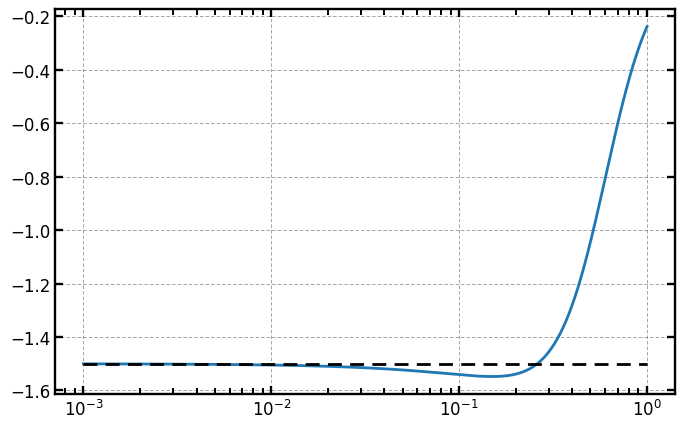

In [62]:
# Check E'/E
plt.semilogx(df_out.E_kmou_a*df_out.index/df_out.E_kmou)
plt.hlines(-3/2, 1e-3, 1, colors='k', linestyles='--')

### Comparison with Ben: $K_0=1$, $\beta=0.2$, $n=2$

In [63]:
header_str = 'a,  H_MG,  H_LCDM, H_MG/H_LCDM,  aH dH/da / H0^2 ,  phi , d phi/ dlna'
header = [s.strip(' ')for s in header_str.split(',')]

df_Ben_BG = pd.DataFrame(np.loadtxt('./Data/Background/background_k01_glam.dat'), columns=header).set_index('a')

In [64]:
df_Ben_BG['A'] = np.e**(df_Ben_BG.phi*0.2)
df_Ben_BG['a_J'] = df_Ben_BG['A']*df_Ben_BG.index

In [65]:
a_E = np.logspace(-4,0,1000)
a_J = dum_kmou.get_a_Jor(a_E)

In [66]:
header, table = dum_kmou.eval(a_vals=a_J)
df_out = pd.DataFrame(np.array(table).T, columns=header).set_index('a')

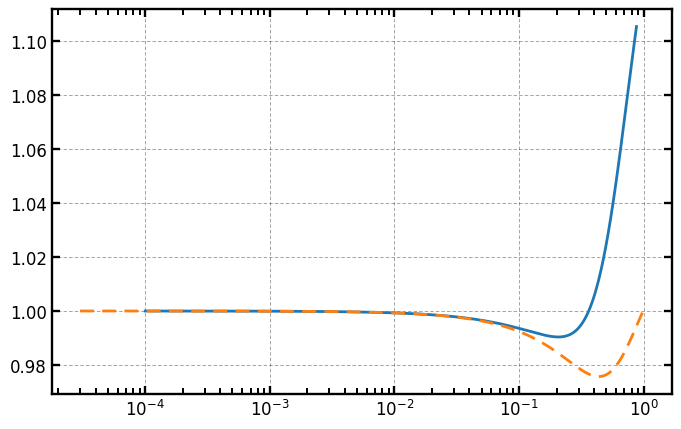

In [67]:
plt.semilogx((df_out['E_kmou']/dum_kmou.E_LCDM_fun(a_E)))
plt.semilogx((df_Ben_BG['H_MG']/df_Ben_BG['H_LCDM']),'--')
# plt.ylim(0.9,1.1)

# Compute growth factor

In [68]:
dum_kmou.get_growth()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 3.000e-05  8.143e-05 ...  8.735e-01  1.000e+00]
        y: [[ 1.000e+00  1.000e+00 ...  5.259e-01  4.066e-01]
            [ 3.000e-05  8.143e-05 ...  8.461e-01  9.048e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x139aab920>
 t_events: None
 y_events: None
     nfev: 218
     njev: 0
      nlu: 0

In [69]:
dum_kmou.get_growth_LCDM()

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 3.000e-05  2.695e-02 ...  9.528e-01  1.000e+00]
        y: [[ 1.000e+00  1.000e+00 ...  4.418e-01  4.089e-01]
            [ 3.000e-05  2.695e-02 ...  7.642e-01  7.843e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x139aab5f0>
 t_events: None
 y_events: None
     nfev: 80
     njev: 0
      nlu: 0

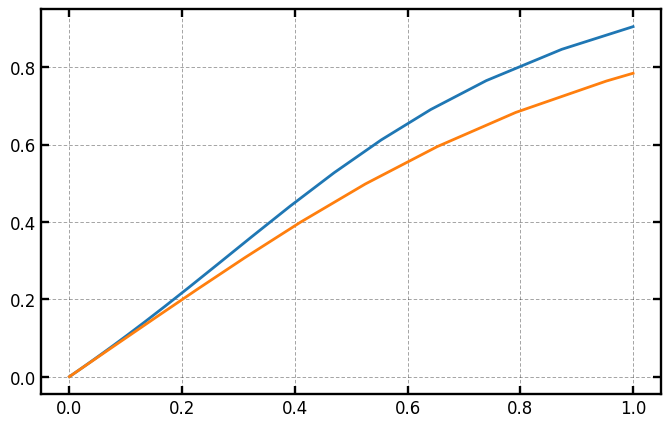

In [70]:
plt.plot(dum_kmou.D_kmou_J['t'],dum_kmou.D_kmou_J['y'][1])
plt.plot(dum_kmou.D_LCDM['t'],dum_kmou.D_LCDM['y'][1])


# Compare with old results

In [116]:
old_header = ['a_E', 'a_J', 'E_J', 'dE_J_da', 'phi_J', 'dphi_J_dtau', 'G_eff_G', 'A_conf', 'D_kmou']
df_old = pd.DataFrame(np.loadtxt('./Data/Output/n2-beta0p2-k1/out_table.txt'), columns=old_header)

In [117]:
ngt2_header = ['a_E', 'a_J', 'E_J', 'dE_J_da', 'phi_J', 'dphi_J_dtau', 'G_eff_G', 'A_conf', 'D_kmou']
df_ngt2 = pd.DataFrame(np.loadtxt('/Users/bartolomeo/Downloads/out_table.txt'), columns=ngt2_header)

In [118]:
header, table = dum_kmou.eval(a_vals=df_old['a_J'])
df_out = pd.DataFrame(np.array(table).T, columns=header).set_index('a')

In [119]:
header, table = dum_kmou.eval(a_vals=df_ngt2['a_J'])
df_out_ngt2 = pd.DataFrame(np.array(table).T, columns=header).set_index('a')

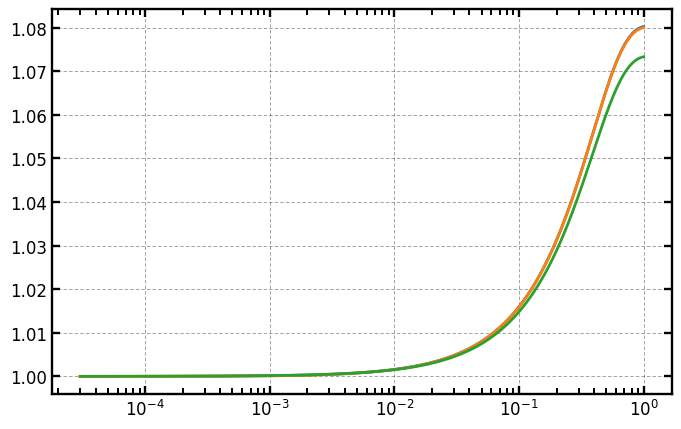

In [120]:
# produce familiar growth ratio with LCDM
a_E = np.logspace(-4,0,1000)
a_J = dum_kmou.get_a_Jor(a_E)

plt.semilogx(a_E , dum_kmou.D_kmou_J.sol(a_J)[1]/dum_kmou.D_LCDM.sol(a_E)[1])
plt.semilogx(df_old.a_E , df_old['D_kmou']/dum_kmou.D_LCDM.sol(df_old.a_E)[1])
plt.semilogx(df_ngt2.a_E , df_ngt2['D_kmou']/dum_kmou.D_LCDM.sol(df_ngt2.a_E)[1])


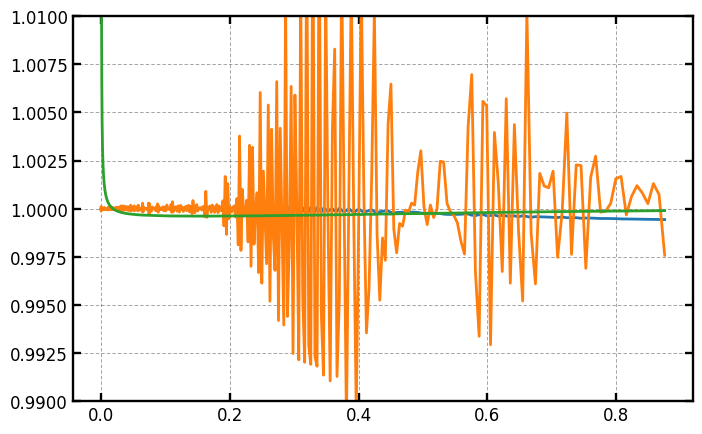

In [122]:
plt.plot(df_out['E_kmou']/df_old['E_J'].values)
plt.plot(df_out['E_kmou_a']/df_old['dE_J_da'].values)
plt.plot(df_out['phi']/df_old['phi_J'].values)
plt.ylim(0.99,1.01)

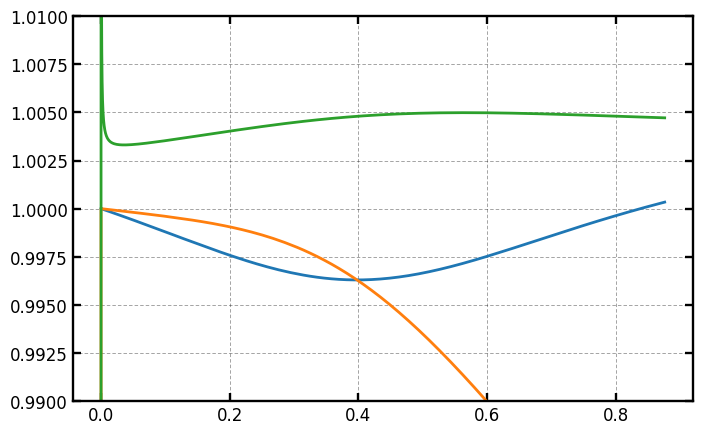

In [124]:
plt.plot(df_out_ngt2['E_kmou']/df_ngt2['E_J'].values)
plt.plot(df_out_ngt2['E_kmou_a']/df_ngt2['dE_J_da'].values)
plt.plot(df_out_ngt2['phi']/df_ngt2['phi_J'].values)
plt.ylim(0.99,1.01)

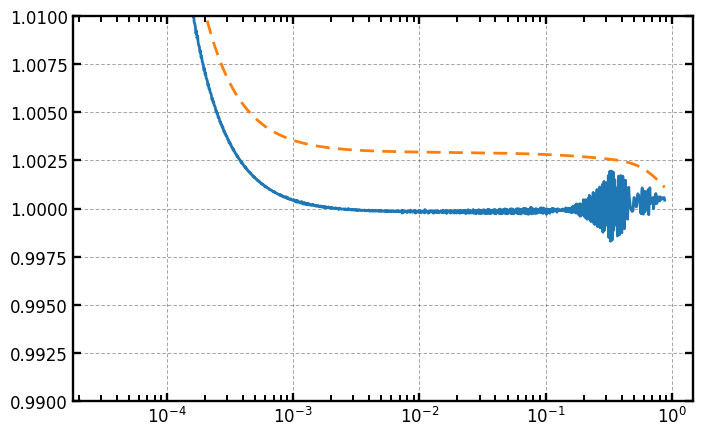

In [128]:
plt.semilogx(df_out.index**2*df_out.E_kmou*df_out['phi_a']/df_old['dphi_J_dtau'].values*1/2997)
plt.semilogx(df_out_ngt2.index**2*df_out_ngt2.E_kmou*df_out_ngt2['phi_a']/df_ngt2['dphi_J_dtau'].values,'--')
plt.ylim(0.99,1.01)

In [135]:
df_out

,phi,phi_a,E_kmou,E_kmou_a,A,mu_kmou
a,,,,,,
0.000030,-0.0,-1.0,3382397.912516,-169121584814.447,1.0,1.000017
0.000030,-0.0,-1.009308,3329917.518248,-164770858675.900,1.0,1.000017
0.000031,-0.000001,-1.018306,3278252.114317,-160532116370.921,1.0,1.000017
0.000031,-0.000001,-1.027012,3227388.154543,-156402402979.708,1.0,1.000017
0.000031,-0.000001,-1.035442,3177312.434914,-152378852444.268,1.0,1.000016
...,...,...,...,...,...,...
0.840953,-0.657529,-0.211858,1.121642,-0.513971783843753,0.876774,1.078887
0.849463,-0.659308,-0.206414,1.117354,-0.493689125057784,0.876462,1.07893
0.858065,-0.661061,-0.201071,1.113193,-0.474138492890176,0.876155,1.078972


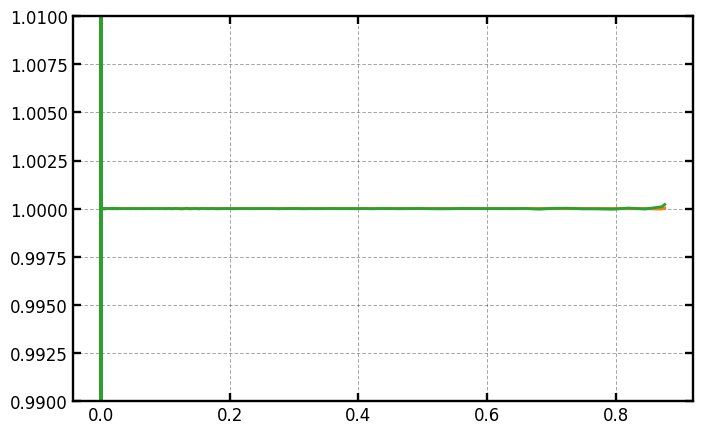

In [146]:
plt.plot(InterpolatedUnivariateSpline(df_out.index, df_out['E_kmou']).derivative()(df_out.index)/
        df_out['E_kmou_a'])
plt.plot(InterpolatedUnivariateSpline(df_out_ngt2.index, df_out_ngt2['E_kmou']).derivative()(df_out_ngt2.index)/
        df_out_ngt2['E_kmou_a'])
plt.plot(df_ngt2.a_J, InterpolatedUnivariateSpline(df_ngt2.a_J, df_ngt2.E_J).derivative()(df_ngt2.a_J)/
        df_ngt2['dE_J_da'])
plt.ylim(0.99,1.01)